# **Linear Regression with shap**

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap

c:\Users\jmart\anaconda3\envs\StarterPack\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **Datos**

In [4]:
X, y = shap.datasets.california(n_points=1000)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## **Modelo**

In [6]:
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)

LinearRegression()

### **Análisis de los coeficientes**

In [8]:
print('Coeficientes del modelo: \n')
for i in range(X.shape[1]):
    print(f'{X.columns[i]}: {round(model.coef_[i], 2)}')
    

Coeficientes del modelo: 

MedInc: 0.46
HouseAge: 0.01
AveRooms: -0.14
AveBedrms: 1.14
Population: 0.0
AveOccup: -0.28
Latitude: -0.43
Longitude: -0.43


In [9]:
X100 = shap.utils.sample(X, 100) 

### **Dependencias parciales**

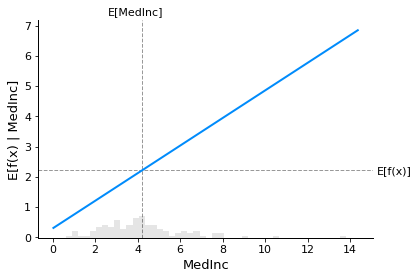

In [10]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True
)

### **Valores SHAP en dependencias parciales**

In [11]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X_train)

Exact explainer: 801it [00:14, 23.67it/s]                         


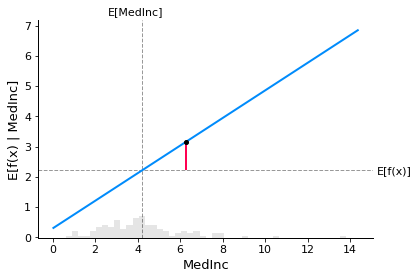

In [13]:
sample_ind = 200

shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

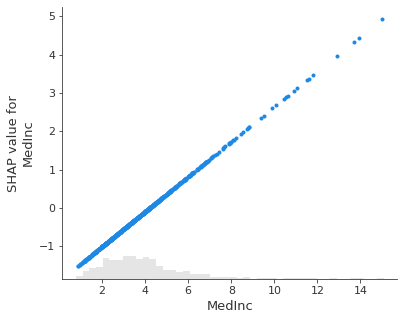

In [14]:
shap.plots.scatter(shap_values[:,"MedInc"])

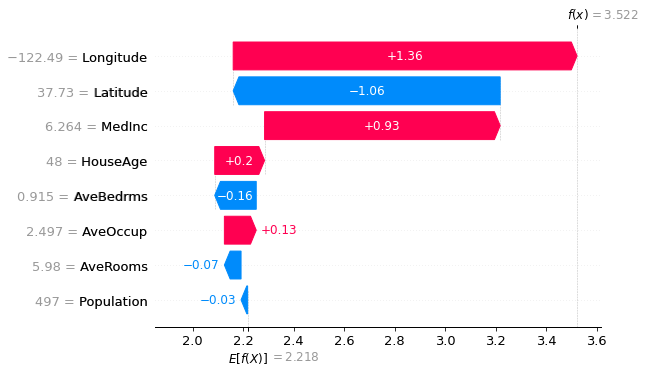

In [15]:
shap.plots.waterfall(shap_values[200], max_display=14)